<a href="https://colab.research.google.com/github/Gianuzzi/Proc_de_Img_-DD2020/blob/main/Ejercicio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 2

In [1]:
#Libs
import os
import sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    from subprocess import getoutput
    getoutput("git clone -l -s https://gist.github.com/Gianuzzi/8500100a094ade398c55b827e55c6a3a cloned-repo")
    os.chdir('cloned-repo')
    import libs_PI
    os.chdir('/content')
    
from libs_PI import *

## Carga de imagen

Se debe otorgar el ``path`` al archivo, ya sea uno en el ordenador, o un URL.

Por Default se intenta leer una imagen JPG; en caso de que sea otro formato, especificarlo. 

Formatos disponibles: **['png',  'jpeg', 'webp', 'bmp', 'dib', 'jpe', 'jp2',  'pbm', 'pgm', 'ppm', 'pxm', 'jpg', 'pnm']**

Tamaño de la imagen: (563, 920, 3)


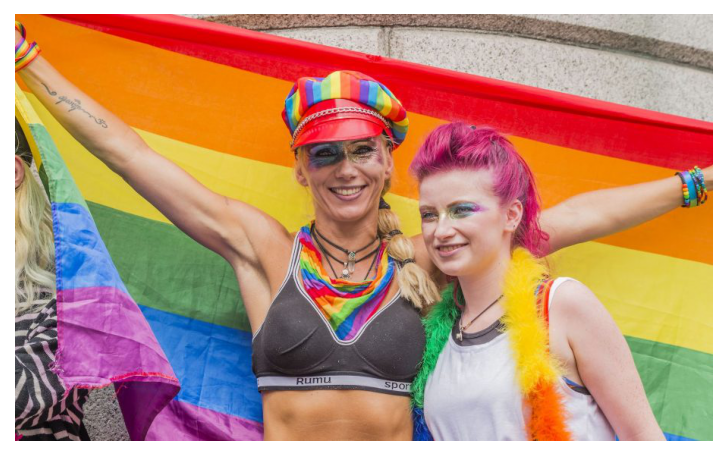

In [2]:
path    = 'https://img.ti-media.net/wp/uploads/sites/46/2018/06/pride-month-920x563.jpg'
formato = 'jpg'

# Cargamos el archivo

if in_colab:
    try:
        getoutput("wget "+path+" -O Imagen")
        path = data_dir = os.path.join(os.getcwd(), 'Imagen')
    except:
        print('No se pudo descargar la imagen.')

# Cargamos el archivo
img = mpimg.imread(path, format=formato)

# Definimos RGB y RGB normalizado
if img.ravel().dtype == float: RGB = (img*255).astype('uint8')
else                         : RGB = img.copy() ; img = RGB/255
print('Tamaño de la imagen:', img.shape)

# Ploteo
plt.figure(dpi=150)
plt.axis('off')
plt.imshow(img)
plt.show()

## Procesamiento

### Transformación de imagen en RGB al espacio YIQ, y extracción de componente Y

In [3]:
YIQ = RGBtoYIQ(RGB, verb=True) # Pasamos a YIQ
Y   = YIQ[:,:,0]               # Obtenemos Y

Se ha transformado de RGB a YIQ


### Ploteo de histograma de luminancias

Se permite setear:
- Normalización de histograma _(density=True)_
- Bines
    - Ancho
    - Cantidad

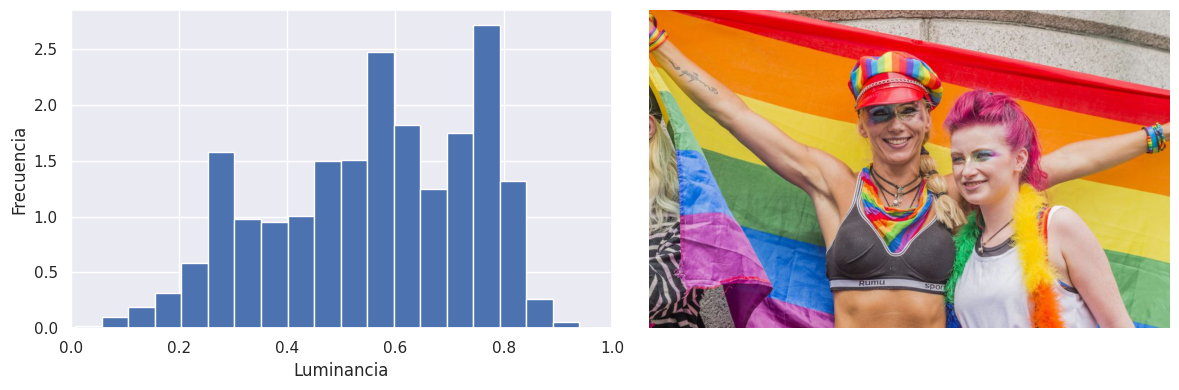

In [4]:
density = True
bins    = 20

# Plot
plt.figure(dpi=100, figsize=(12, 4))
plt.subplot(1,2,1)
plt.hist(Y.ravel(), bins=bins, density=density)
plt.xlim(0,1)
plt.ylabel('Frecuencia')
plt.xlabel('Luminancia')
plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(img)
plt.tight_layout()

plt.show()

## Manipulación de histograma de luminancias

La función ``ChangeY`` aplicar una cierta transformación a su input (Componente **Y**). La función a aplicar puede ser una función *built-in* (llamable, EJ.: np.mean, np.sqrt, etc.; tener en cuenta que se deberán introducir los argumentos necesarios), o el nombre de una de la siguiente lista:

  - ['raíz', 'sqrt']     

      -> Para raíz cuadrada: Y = sqrt(Y)
  - ['cuadrado', 'square']  

      -> Para elevar al cuadrado: Y = Y * Y
  - ['constante', 'constant'] 

      -> Para multiplicar por una constante: Y = Y * c
        Se debe introducir como argumento el parámetro:
          c = <valor>
  - ['lineal', 'linear']

      -> Para aplicar función lineal: Y = Y * a + b
        Se deben introducir como argumento los parámetros:
          a = <valor>
          b = <valor> 
  - ['potencia', 'power']

      -> Para elevar a cierta potencia: Y = Y**p
        Se debe introducir como argumento el parámetro:
          p = <valor> (Potencia)
  - ['lineal_a_trozos', 'PiecewiseLinear']

      -> Para aplicar función a trozos: (Ver ``PiecewiseLinear?``)
        Se deben introducir como argumento los parámetros:
          Y_min = <valor>
          Y_max = <valor>

In [5]:
Y_m = ChangeY(Y, 'lineal_a_trozos', Y_min=0.15, Y_max=0.75)

Se aplica la función: lineal_a_trozos


### Transformación de imagen en YIQ al espacio RGB

In [6]:
YIQ_m        = YIQ.copy()
YIQ_m[:,:,0] = Y_m
img_m        = YIQtoRGB(YIQ_m, normed=True, verb=True) # Volvemos a RGB normalizado 
RGB_m        = (img_m*255.).astype('uint8')            # RGB en bits

Se ha transformado de YIQ a RGB


### Ploteo de histograma e imagen de luminancias modificadas (comparación)

Se permite setear:
- Normalización de histograma _(density=True)_
- Bines
    - Ancho
    - Cantidad

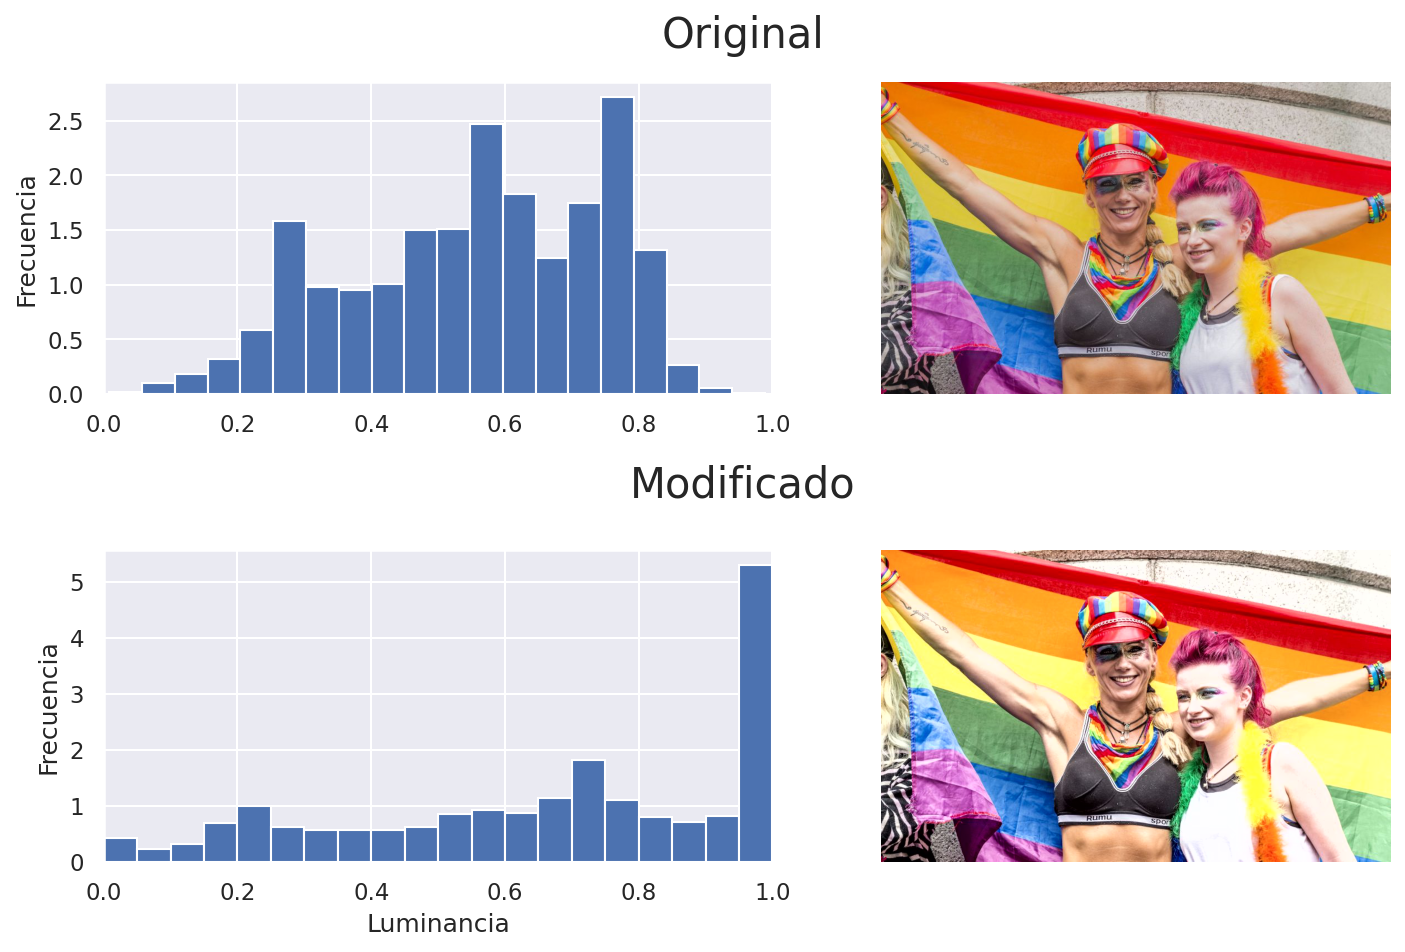

In [7]:
density = True
bins    = 20

# Plot
plt.figure(dpi=150, figsize=(10, 6))
plt.subplot(2,2,1)
plt.figtext(0.5,1.05, "Original", ha="center", va="top", fontsize=20)

plt.hist(Y.ravel(), bins=bins, density=density)
plt.xlim(0,1)
plt.ylabel('Frecuencia')
plt.subplot(2,2,2)
plt.axis('off')
plt.imshow(img)

plt.subplot(2,2,3)
plt.figtext(0.5,0.55, "Modificado", ha="center", va="top", fontsize=20)
plt.hist(Y_m.ravel(), bins=bins, density=density)
plt.xlim(0,1)
plt.ylabel('Frecuencia')
plt.xlabel('Luminancia')
plt.subplot(2,2,4)
plt.axis('off')
plt.imshow(img_m)

plt.tight_layout()
plt.subplots_adjust(hspace = 0.5)

plt.show()

# Guardado

Se debe especificar el nombre y formato.

In [8]:
if not in_colab:
    name     = 'Img_Procesada2'
    formato  = 'jpg'

    IMG = Image.fromarray(RGB_m)
    IMG.save(name+'.'+formato)